In [1]:
import pandas as pd
import numpy as np

# Load and Check Data

In [2]:
data = pd.read_csv('churnData.csv') 

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# Data Preprocessing

In [5]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [7]:
data['TotalCharges'].isnull().sum()

11

In [8]:
median_total_charges = data['TotalCharges'].median()
data['TotalCharges'].fillna(median_total_charges, inplace=True)

/var/folders/z8/twzgj9j154783svk7jbccp280000gn/T/ipykernel_57091/1481296313.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(median_total_charges, inplace=True)


In [9]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
data.drop('customerID', axis=1, inplace=True)

In [11]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


# Data Preparation

In [12]:
data_encoded = pd.get_dummies(data, drop_first=True)

In [13]:
data_encoded.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object')

# Splitting Data

In [14]:
# Split data to features and target
X = data_encoded.drop('Churn_Yes', axis=1)
y = data_encoded['Churn_Yes']

In [15]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Preparation and Training

In [23]:
model = LogisticRegression(max_iter=100000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=100000)

# Predictions

In [24]:
predictions = model.predict(X_test)
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n       False       0.86      0.90      0.88      1036\n        True       0.69      0.60      0.64       373\n\n    accuracy                           0.82      1409\n   macro avg       0.77      0.75      0.76      1409\nweighted avg       0.82      0.82      0.82      1409\n'

# Evaluation

In [25]:
auc_score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
auc_score

0.8623844545426316

# Optimization with Grid Search

In [27]:
param_grid = {'C': [0.1, 1, 10], 'penalty': ['l2']}
grid = GridSearchCV(LogisticRegression(
                    max_iter=100000), 
                    param_grid, 
                    cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=100000),
             param_grid={'C': [0.1, 1, 10], 'penalty': ['l2']})

In [28]:
best_model = grid.best_estimator_
best_predictions = best_model.predict(X_test)
classification_report(y_test, best_predictions)

'              precision    recall  f1-score   support\n\n       False       0.86      0.90      0.88      1036\n        True       0.69      0.59      0.64       373\n\n    accuracy                           0.82      1409\n   macro avg       0.77      0.75      0.76      1409\nweighted avg       0.81      0.82      0.82      1409\n'

In [29]:
best_auc_score = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])
best_auc_score

0.8628450836895878

In [30]:
grid.best_params_

{'C': 0.1, 'penalty': 'l2'}

# Coeficient Analysis

In [31]:
feature_names = X.columns
coefficients = best_model.coef_[0]
coeff_df = pd.DataFrame({'Feature':feature_names, 'Coefficient':coefficients})
coeff_df = coeff_df.sort_values(by='Coefficient', ascending=False)

In [32]:
coeff_df.head(10)

,Feature,Coefficient
10,InternetService_Fiber optic,0.559717
26,PaperlessBilling_Yes,0.330525
28,PaymentMethod_Electronic check,0.315194
8,MultipleLines_No phone service,0.264254
9,MultipleLines_Yes,0.203432
23,StreamingMovies_Yes,0.195401
0,SeniorCitizen,0.174171
21,StreamingTV_Yes,0.101797
5,Partner_Yes,0.046779
2,MonthlyCharges,0.005182


In [33]:
coeff_df.tail(10)

,Feature,Coefficient
14,OnlineBackup_No internet service,-0.099848
22,StreamingMovies_No internet service,-0.099848
11,InternetService_No,-0.099848
6,Dependents_Yes,-0.164135
15,OnlineBackup_Yes,-0.208334
19,TechSupport_Yes,-0.407492
7,PhoneService_Yes,-0.412537
13,OnlineSecurity_Yes,-0.467060
24,Contract_One year,-0.526420
25,Contract_Two year,-1.077420


# Cross Validation

In [34]:
from sklearn.model_selection import cross_val_score

In [35]:
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='roc_auc')

In [36]:
cv_scores

array([0.85769459, 0.85734067, 0.83341988, 0.8386059 , 0.83828701])

In [37]:
cv_scores.mean()

0.8450696098824135

# Setting Hyperparameters

In [44]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, loguniform

In [52]:
param_distribution = {
    'C':loguniform(1e-4, 1e2),
    'penalty':['l2']
}

In [55]:
random_search = RandomizedSearchCV(
    LogisticRegression(max_iter=100000, solver='lbfgs'), 
    param_distribution, 
    n_iter=100,
    cv=5, 
    scoring='roc_auc', 
    random_state=42
)


In [56]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(max_iter=100000),
                   n_iter=100,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x121628f50>,
                                        'penalty': ['l2']},
                   random_state=42, scoring='roc_auc')

In [57]:
random_search.best_params_

{'C': 62.20025976819163, 'penalty': 'l2'}

In [58]:
best_random_model = random_search.best_estimator_

In [59]:
random_auc_score = roc_auc_score(y_test, best_random_model.predict_proba(X_test)[:, 1])

In [60]:
random_auc_score

0.8617038620389827

# Save model

In [68]:
from joblib import dump, load

In [62]:
# Save model
dump(best_random_model, 'churn_model.joblib')

['churn_model.joblib']

# DEMO TEST

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
customers = pd.read_csv('churnData.csv')

In [ ]:
customers['TotalCharges'] = pd.to_numeric(customers['TotalCharges'], errors='coerce')
median_total_charges = customers['TotalCharges'].median()
customers['TotalCharges'].fillna(median_total_charges, inplace=True)

/var/folders/z8/twzgj9j154783svk7jbccp280000gn/T/ipykernel_57091/417976681.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customers['TotalCharges'].fillna(median_total_charges, inplace=True)


In [ ]:
customers.drop('customerID', axis=1, errors='ignore', inplace=True)

In [ ]:
customers_encoded = pd.get_dummies(customers, drop_first=True)

In [ ]:
model = load('churn_model.joblib')

In [ ]:
X_train_columns = model.feature_names_in_

In [ ]:
missing_cols = set(X_train_columns) - set(customers_encoded.columns)
for c in missing_cols:
    customers_encoded[c] = 0

In [ ]:
customers_encoded = customers_encoded[X_train_columns]

In [ ]:
customers_churn = model.predict_proba(customers_encoded)[:, 1]

In [ ]:
customers['Churn_Probability'] = customers_churn

In [ ]:
customers['Churn_Probability'].head()

0    0.654799
1    0.039040
2    0.284658
3    0.028201
4    0.683952
Name: Churn_Probability, dtype: float64

# Churn Probability View

In [79]:
import matplotlib.pyplot as plt

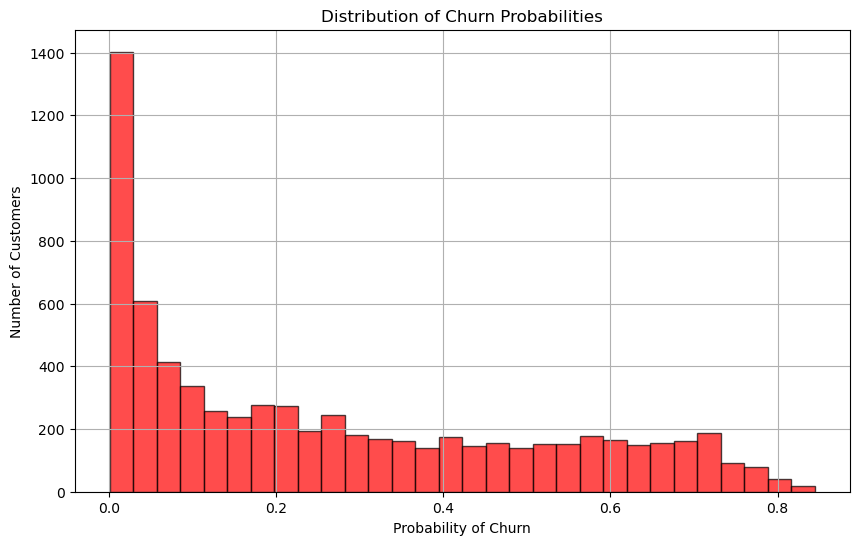

In [87]:
plt.figure(figsize=(10, 6))
plt.hist(customers['Churn_Probability'], bins=30, alpha=0.7, color='red', edgecolor='black')
plt.title('Distribution of Churn Probabilities')
plt.xlabel('Probability of Churn')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

# Feature Importance

In [80]:
coefs = pd.DataFrame(model.coef_[0], index=model.feature_names_in_, columns=['Coefficients'])
coefs['Magnitude'] = coefs['Coefficients'].abs()
top_features = coefs.sort_values(by='Magnitude', ascending=False).head(10)

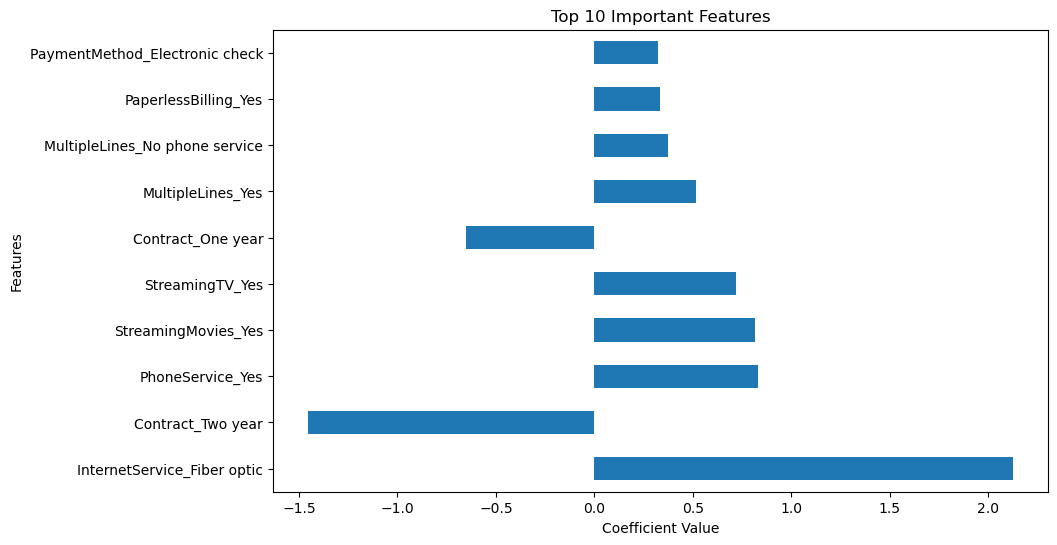

In [81]:
plt.figure(figsize=(10, 6))
top_features['Coefficients'].plot(kind='barh')
plt.title('Top 10 Important Features')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.show()

# Distribution (Churn)

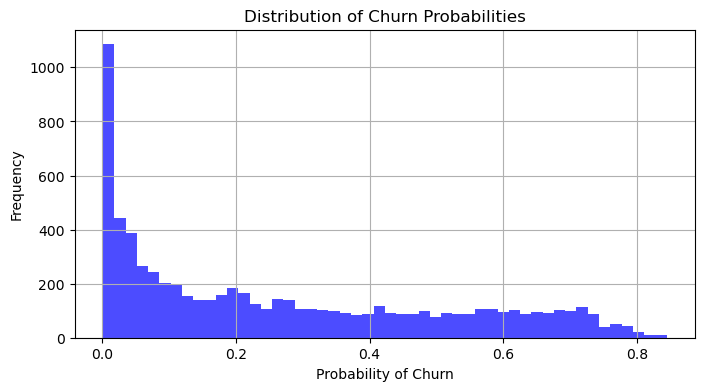

In [84]:
plt.figure(figsize=(8, 4))
plt.hist(customers['Churn_Probability'], bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Churn Probabilities')
plt.xlabel('Probability of Churn')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# ROC Curve

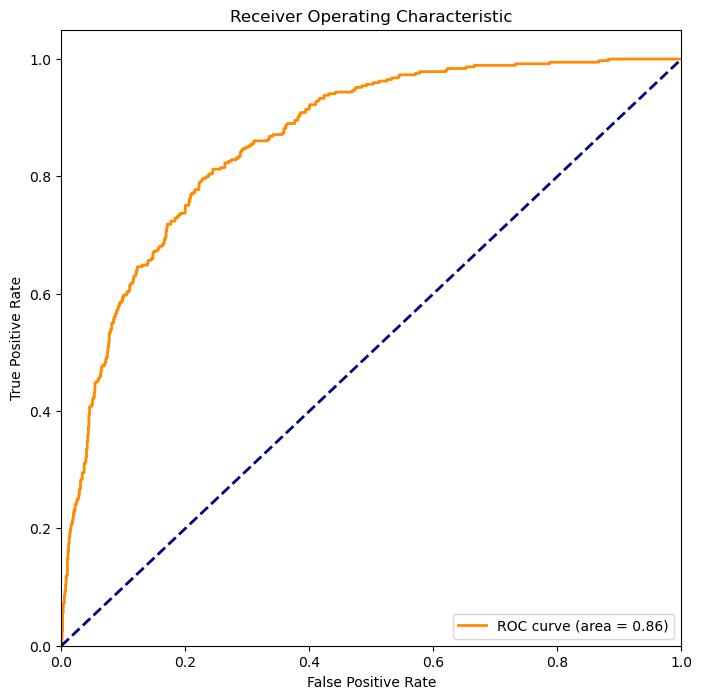

In [85]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix

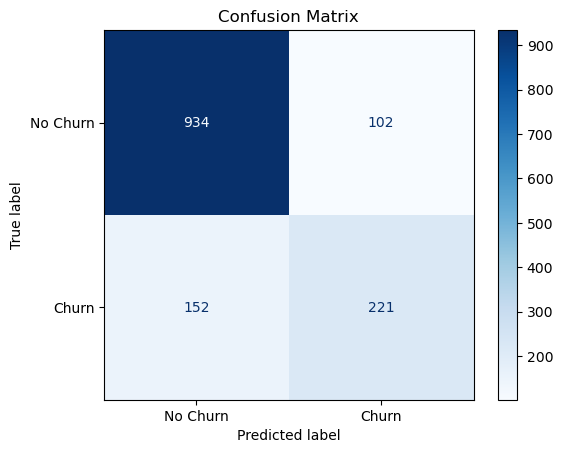

In [86]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, model.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Churn', 'Churn'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()